In [1]:
import torch
import torch.nn as nn

from torch.utils.data import TensorDataset, DataLoader

from task_1_convnet.datasets import FruitDataset
from task_1_convnet.network import BatchNormConv, BatchNormDense, ConvDenseNN
from task_1_convnet.train import Trainer

### Create datasets

In [2]:
train_ds = FruitDataset(r"D:\dnn-exercises\data\fruits-360\Training")
test_ds = FruitDataset(r"D:\dnn-exercises\data\fruits-360\Test")

In [3]:
train_ds = list(DataLoader(train_ds, batch_size=len(train_ds)))
test_ds = list(DataLoader(test_ds, batch_size=len(test_ds)))

In [4]:
train_ds = TensorDataset(train_ds[0]['image'], train_ds[0]['y'].to(torch.long))
test_ds = TensorDataset(test_ds[0]['image'], test_ds[0]['y'].to(torch.long))

### Some n-th attempt, but working, but overfitting

In [17]:
layer_list2 = [
    ('conv1', nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=2, bias = False)), # Out size 49x49
    ('bnc1', BatchNormConv(num_channels=16)),
    ('conv2', nn.Conv2d(in_channels=16, out_channels = 16, kernel_size=3, stride=1, padding=1, bias=False)),
    ('bnc2', BatchNormConv(num_channels=16)),
    ('maxpool1', nn.MaxPool2d(kernel_size=2, stride=2)), # Out size 24x24
    ('conv3', nn.Conv2d(in_channels=16, out_channels=256, kernel_size=3, stride=2, bias=False)), # Out size 11x11
    ('bnc3', BatchNormConv(num_channels=256)),
    ('conv4', nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1)),
    ('bnc4', BatchNormConv(num_channels=256)),
    ('maxpool2', nn.MaxPool2d(kernel_size=2, stride=2)), # Out size 5x5
    ('linear1', nn.Linear(in_features=6400, out_features=512)),
    ('bnd1', BatchNormDense(num_features=512)),
    ('linear2', nn.Linear(in_features=512, out_features=95))
]

net2 = ConvDenseNN(layer_list2)

In [18]:
trainer2 = Trainer(model=net2, max_epochs=500, batch_size=256, learning_rate=1e-3)

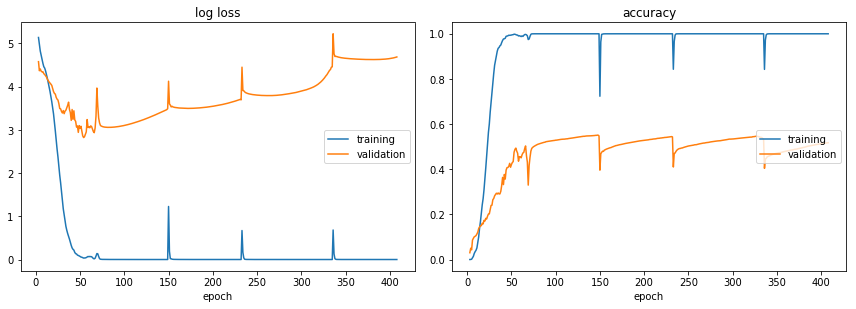

log loss:
training   (min:    0.000, max:    7.157, cur:    0.000)
validation (min:    2.821, max:    5.222, cur:    4.686)

accuracy:
training   (min:    0.000, max:    1.000, cur:    1.000)
validation (min:    0.030, max:    0.551, cur:    0.517)


KeyboardInterrupt: 

In [19]:
trainer2.train(train_ds, test_ds)